<center><a target="_blank" href="http://www.propulsion.academy"><img src="https://drive.google.com/uc?id=1MleNI0rcICpvrGd7SdYuQz7dn8NlAlEc" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>

_____

<center> <h1> Auto ML for Machine Learning (Live coding) </h1> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center>SIT Academy, 2022</center>

We will look at how to solve a classification problem using a variety of Auto-ML methods and libraries:

- Auto-Sklearn
- TPOT


# Auto ML for Machine Learning (Live coding)

## Load Dependencies

#### Step 2: Install Auto Sklearn and then restart runtime and goto Step 3

In [ ]:
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   249  100   249    0     0   1096      0 --:--:-- --:--:-- --:--:--  1092
     |████████████████████████████████| 28.5 MB 2.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 22.3 MB 1.9 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |███████████████████

In [ ]:
!pip install auto-sklearn

     |████████████████████████████████| 6.3 MB 6.7 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.14.0-py3-none-any.whl size=6585992 sha256=fc1e7a35ffaeb0555b20e3cf5853bec41dd15417e5caac45f94c98aa3af757e1
  Stored in directory: /root/.cache/pip/wheels/c5/56/cc/e33d4a8cb4ffeb040d59ea08c4715d20806945dc80d3c25384
Successfully built auto-sklearn


#### Step 3: Install TPOT and then restart runtime and continue

In [ ]:
!curl https://raw.githubusercontent.com/EpistasisLab/tpot/master/requirements.txt | xargs -n 1 -L 1 pip install

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   187  100   187    0     0   1016      0 --:--:-- --:--:-- --:--:--  1016
     |████████████████████████████████| 160 kB 9.7 MB/s 
     |████████████████████████████████| 154 kB 8.4 MB/s 
     |████████████████████████████████| 206 kB 7.6 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11952 sha256=1e11c0536738b102bc56988fa1d158984b5bce55422fe45d4bc9c480966c9999
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
     |████████████████████████████████| 166.7 MB 15 kB/s 
  Attempting uninstall: xgboost
    Found existing installa

In [ ]:
!pip install tpot

     |████████████████████████████████| 87 kB 3.9 MB/s eta 0:00:011


#### Install Check

Scikit Learn should be > 0.24 at least

In [ ]:
import sklearn
print(sklearn.__version__)

0.24.2


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

## Data Generation

We will be using the standard Boston Housing Dataset as a classification problem

Boston Houses Classification

- Price > \$ 30K is Class Label 1

- Price <= \$ 30K is Class Label 0 

In [ ]:
from sklearn.datasets import load_boston
res = load_boston(return_X_y=False)

X = res.data
y = res.target
X.shape, y.shape

((506, 13), (506,))

In [ ]:
print(res.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
features = res.feature_names

X = pd.DataFrame(X, columns=features)
y = pd.DataFrame({'Price': [1 if hp > 30 else 0 for hp in y]})

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
y.head()

,Price
0,0
1,0
2,1
3,1
4,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((404, 13), (102, 13))

## Auto-ML with auto-sklearn

Here we will use the `auto-sklearn` library to build classification models. Do check out the [package documentation](https://automl.github.io/auto-sklearn/master/) when needed.

It leverages recent advantages in Bayesian optimization, meta-learning and ensemble construction.

### Load Dependencies

In [ ]:
import autosklearn.classification
import autosklearn.metrics

### Create Auto-ML Modeling Strategy

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=300, # max time for all your expt. is 300s = 5 mins
    per_run_time_limit=30, # per model training-tuning shouldnt take more than 30s
    memory_limit=None,
    seed=1,
    resampling_strategy='holdout', 
    # train model on 80% of the training data 
    # and select best model from 20% of training data (validation split)
    # 1 fold cross validation
    resampling_strategy_arguments={
        'train_size': 0.8,
        'shuffle': True
    },
    metric=autosklearn.metrics.f1_weighted,
    scoring_functions=[autosklearn.metrics.f1_weighted, autosklearn.metrics.balanced_accuracy,
                       autosklearn.metrics.precision_weighted, autosklearn.metrics.recall_weighted],
    tmp_folder='./autosklearn_classification_example_out',
)

### Train Models to select Best Approach

In [ ]:
automl.fit(X_train, y_train, dataset_name='boston_houses')

AutoSklearnClassifier(memory_limit=None, metric=f1_weighted,
                      per_run_time_limit=30,
                      resampling_strategy_arguments={'shuffle': True,
                                                     'train_size': 0.8},
                      scoring_functions=[f1_weighted, balanced_accuracy,
                                         precision_weighted, recall_weighted],
                      time_left_for_this_task=300,
                      tmp_folder='./autosklearn_classification_example_out')

### View Training Details

In [ ]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: boston_houses
  Metric: f1_weighted
  Best validation score: 0.975309
  Number of target algorithm runs: 57
  Number of successful target algorithm runs: 57
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



In [ ]:
def get_metric_result(cv_results):
    results = pd.DataFrame.from_dict(cv_results)
    results = results[results['status'] == "Success"]
    cols = ['rank_test_scores', 'param_classifier:__choice__', 'mean_test_score']
    cols.extend([key for key in cv_results.keys() if key.startswith('metric_')])
    return results[cols]


print("Metric results:")
print(get_metric_result(automl.cv_results_).to_string(index=False))

Metric results:
 rank_test_scores param_classifier:__choice__  mean_test_score  metric_f1_weighted  metric_balanced_accuracy  metric_precision_weighted  metric_recall_weighted
                1               random_forest         0.975309            0.975309                  0.959091                   0.975309                0.975309
               25           gradient_boosting         0.925926            0.925926                  0.877273                   0.925926                0.925926
               46                  libsvm_svc         0.807123            0.807123                  0.698485                   0.812840                0.802469
               17           gradient_boosting         0.939032            0.939032                  0.910606                   0.940207                0.938272
               31               random_forest         0.912415            0.912415                  0.843939                   0.911672                0.913580
                1       

In [ ]:
print(automl.show_models())

[(0.100000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'random_forest', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'select_percentile_classification', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.49178203939298715, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 1, 'classifier:random_forest:min_samples_split': 2, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean',

In [ ]:
models = automl.get_models_with_weights()

weights = [row[0] for row in models]
models = [row[1] for row in models]
models = [model.config.get_dictionary()['classifier:__choice__'] for model in models]

final_model = pd.DataFrame({
    'weight': weights,
    'model': models
})

final_model

,weight,model
0,0.10,random_forest
1,0.08,gradient_boosting
2,0.06,random_forest
3,0.06,extra_trees
4,0.06,gradient_boosting
5,0.06,qda
6,0.06,k_nearest_neighbors
7,0.04,random_forest
8,0.04,random_forest
9,0.04,random_forest


In [ ]:
models = automl.get_models_with_weights()
[row[1] for row in models][0].config.get_dictionary()

{'balancing:strategy': 'weighting',
 'classifier:__choice__': 'random_forest',
 'classifier:random_forest:bootstrap': 'False',
 'classifier:random_forest:criterion': 'gini',
 'classifier:random_forest:max_depth': 'None',
 'classifier:random_forest:max_features': 0.49178203939298715,
 'classifier:random_forest:max_leaf_nodes': 'None',
 'classifier:random_forest:min_impurity_decrease': 0.0,
 'classifier:random_forest:min_samples_leaf': 1,
 'classifier:random_forest:min_samples_split': 2,
 'classifier:random_forest:min_weight_fraction_leaf': 0.0,
 'data_preprocessor:__choice__': 'feature_type',
 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'no_encoding',
 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer',
 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.0241330876102082,
 'data_preprocessor:feature_type:numerical_tra

### Predict and Evaluate Performance

In [ ]:
predictions = automl.predict(X_test)
predictions[:5]

array([0, 1, 0, 0, 0])

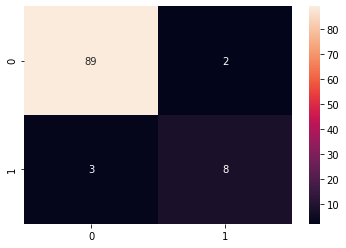

In [ ]:
cf = confusion_matrix(y_test, predictions)
sns.heatmap(cf, annot=True);

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        91
           1       0.80      0.73      0.76        11

    accuracy                           0.95       102
   macro avg       0.88      0.85      0.87       102
weighted avg       0.95      0.95      0.95       102



## Auto-ML with TPOT

Here we will use the `tpot` library to build classification models. Do check out the [package documentation](https://epistasislab.github.io/tpot) when needed.

TPOT will automate the most tedious part of machine learning by intelligently exploring thousands of possible pipelines using genetic programming.

### Load Dependencies

In [ ]:
from tpot import TPOTClassifier

### Create Auto-ML Modeling Strategy

In [ ]:
tpot_clf = TPOTClassifier(generations=100,
                          population_size=200,
                          offspring_size=200,
                          mutation_rate=0.9,
                          crossover_rate=0.1,
                          scoring='neg_log_loss',
                          cv=5,
                          max_time_mins=5,
                          random_state=13,
                          verbosity=3)

### Train Models to select Best Approach

In [ ]:
tpot_clf.fit(X_train, y_train)

32 operators have been imported by TPOT.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/200 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12']
expected AGE, CHAS, LSTAT, INDUS, DIS, CRIM, TAX, RM, NOX, ZN, RAD, PTRATIO, B in input data
training data did not have the following fields: f2, f11, f8, f0, f7, f6, f4, f12, f1, f10, f9, f5, f3.
_pre_test decorator: _random_mut

TPOTClassifier(max_time_mins=5, offspring_size=200, population_size=200,
               random_state=13, scoring='neg_log_loss', verbosity=3)

### View Training Details

In [ ]:
tpot_clf

TPOTClassifier(max_time_mins=5, offspring_size=200, population_size=200,
               random_state=13, scoring='neg_log_loss', verbosity=3)

In [ ]:
tpot_clf.fitted_pipeline_

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, max_features=0.3,
                                        min_samples_leaf=2, min_samples_split=4,
                                        random_state=13))])

### Predict and Evaluate Performance

In [ ]:
predictions = tpot_clf.predict(X_test)
predictions[:5]

array([0, 1, 0, 0, 0])

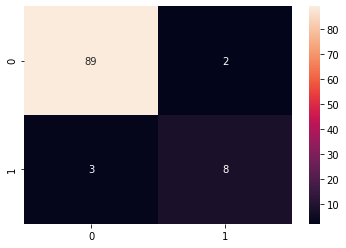

In [ ]:
cf = confusion_matrix(y_test, predictions)
sns.heatmap(cf, annot=True);

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        91
           1       0.80      0.73      0.76        11

    accuracy                           0.95       102
   macro avg       0.88      0.85      0.87       102
weighted avg       0.95      0.95      0.95       102



### Export Final Model Pipeline

In [ ]:
tpot_clf.export('tpot_boston_clf.py')

In [ ]:
!cat tpot_boston_clf.py

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=13)

# Average CV score on the training set was: -0.10587904546883693
exported_pipeline = RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.3, min_samples_leaf=2, min_samples_split=4, n_estimators=100)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 13)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)
